In [1]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Resize
)
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%matplotlib inline
IMG_SIZE = 500
train_set = []
imagePath = '/kaggle/input/artgenreset/testSet/Impressionism'

In [3]:
#documentation function
def flips_color(p=1):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        OpticalDistortion(),
        GridDistortion(),
        HueSaturationValue()
    ], p=p)

def strong_aug(p=1):
    return Compose([
        RandomRotate90(p=0.5),
        Flip(p=0.5),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.3),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.3),
        ShiftScaleRotate(
            shift_limit=0.0625,
            scale_limit=0.2,
            rotate_limit=45,
            p=0.3
        ),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
#             RandomBrightnessContrast(),            
        ], p=0.3),
#         HueSaturationValue(p=0.3),
    ], p=p)


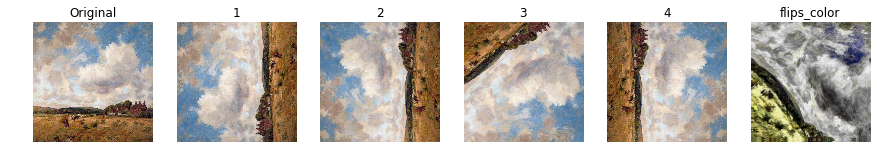

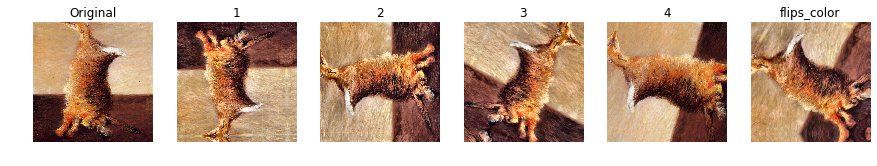

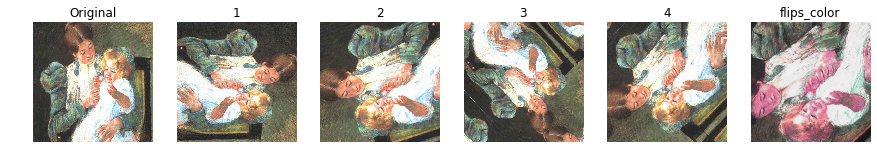

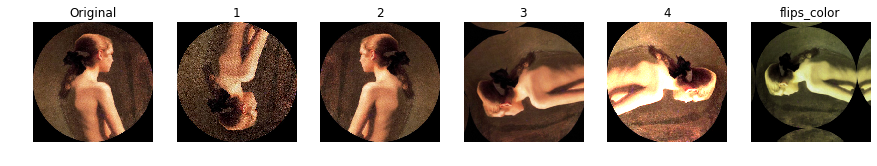

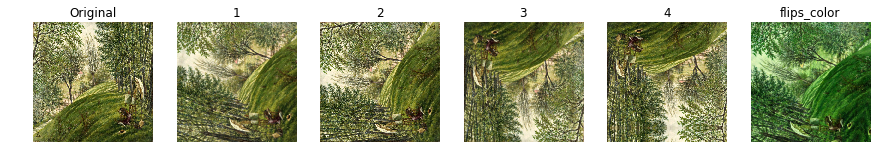

In [4]:
# the list of augmentations
# keys are used as names for labels, values should be augment functions
# Simply copying multiple
aug_list = {
    '1': strong_aug(),
    '2': strong_aug(),
    '3': strong_aug(),
    '4': strong_aug(),
    'flips_color': flips_color(),
}

all_images = os.listdir(imagePath)
n_images = 5
## Select "n_images" random images from the folder
for img in np.random.choice(all_images, n_images, replace=False):
    ## Read image
    image = mpimg.imread(os.path.join(imagePath, img))
    ## Resize image to IMG_SIZE x IMG_SIZE
    image = Resize(height=IMG_SIZE, width=IMG_SIZE)(image=image)['image']
    
    ## add 1,X subplots, X = number of transforms + 1 for original. For better visualization.
    f, axarr = plt.subplots(1, len(aug_list)+1, figsize=(15,15))
    
    ## Remove axis info from subplots
    [ax.axis('off') for ax in  axarr]
     
    ## For original
    axarr[0].set_title('Original')
    axarr[0].imshow(image)
    
    ## Loop through the aug_list, apply each augmentation and show the output
    for i, aug_name in enumerate(aug_list):
        augmented = aug_list[aug_name]
        axarr[i+1].set_title(aug_name)
        axarr[i+1].imshow(aug_list[aug_name](image=image)['image'])